In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Análise de influência do clima

In [ ]:
#Dados Clima
#Raul ajustara os dados
clima = pd.read_csv('dados_A840_M_2006-11-30_2023-10-25.csv', sep = ';', skiprows = 10)
clima.drop(['Unnamed: 4'], axis=1, inplace=True)
#clima["Ano"]=clima['Data Medicao'].str.slice(0, 4)
clima['Data Medicao'] = pd.to_datetime(clima['Data Medicao'])
clima.set_index('Data Medicao', inplace=True)
clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].str.replace(',', '.', regex=True)
clima['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = clima['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].str.replace(',', '.', regex=True)
clima['NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)'] = pd.to_numeric(clima['NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)'], errors='coerce')
clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = pd.to_numeric(clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], errors='coerce')
clima['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = pd.to_numeric(clima['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], errors='coerce')
clima.info()
clima.dropna(inplace=True)
clima.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-11-30 to 2023-10-31
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)  201 non-null    float64
 1   PRECIPITACAO TOTAL, MENSAL (AUT)(mm)                   183 non-null    float64
 2   TEMPERATURA MEDIA, MENSAL (AUT)(°C)                    196 non-null    float64
dtypes: float64(3)
memory usage: 6.4 KB


,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
Data Medicao,,,
2007-01-31,15,133,22
2007-03-31,19,195,22
2007-04-30,14,57,20
2007-05-31,16,176,13
2007-06-30,11,57,14


In [ ]:
# Agrupe os valores mensais por ano
clima_por_ano = clima.resample('Y').agg({'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)': 'sum', 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)':'sum' ,'TEMPERATURA MEDIA, MENSAL (AUT)(°C)': 'mean'})
clima_por_ano.T.head()


Data Medicao,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31,2023-12-31
"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)",135,144,118,169,155,114,162,175,106,114,129,156,135,125,143,180,89
"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)",1579,1483,1405,1632,1616,1343,1854,2024,1091,1508,1595,1802,1180,1404,1298,1634,1033
"TEMPERATURA MEDIA, MENSAL (AUT)(°C)",17,17,19,17,17,18,17,18,19,16,18,18,18,18,17,17,19


In [ ]:
clima_por_ano.index.name = "Data"
clima_por_ano_m = clima_por_ano.reset_index().melt(id_vars=["Data"],value_vars=clima_por_ano.columns)
clima_por_ano_m.columns = ["Data","Variável","Valor"]
clima_por_ano.head()

,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
Data,,,
2007-12-31,135,1579,17
2008-12-31,144,1483,17
2009-12-31,118,1405,19
2010-12-31,169,1632,17
2011-12-31,155,1616,17


## Precipitação

In [ ]:
clima_por_ano.head()
clima_por_ano.index = pd.to_datetime(clima_por_ano.index).strftime('%m-%y')

<function matplotlib.pyplot.show(close=None, block=None)>

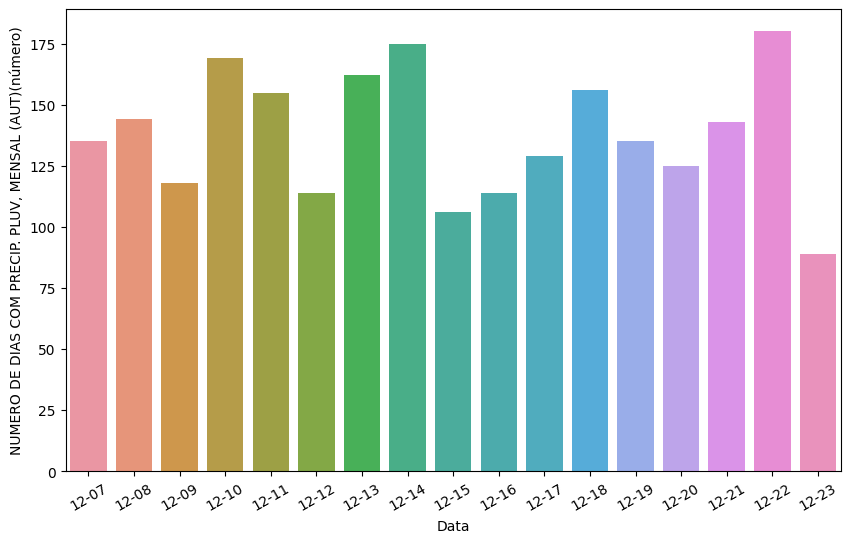

In [ ]:
# @title
plt.figure(figsize=(10,6))
ax = sns.barplot(data=clima_por_ano,x=clima_por_ano.index,y="NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)")
plt.xticks(rotation=30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

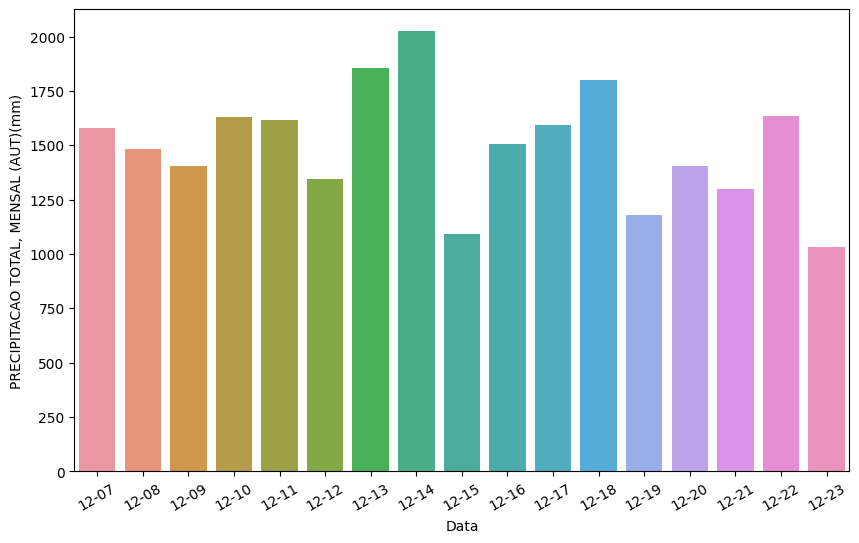

In [ ]:
# @title
plt.figure(figsize=(10,6))
ax = sns.barplot(data=clima_por_ano,x=clima_por_ano.index,y="PRECIPITACAO TOTAL, MENSAL (AUT)(mm)")
plt.xticks(rotation=30)
plt.show

## Temperatura Média

<function matplotlib.pyplot.show(close=None, block=None)>

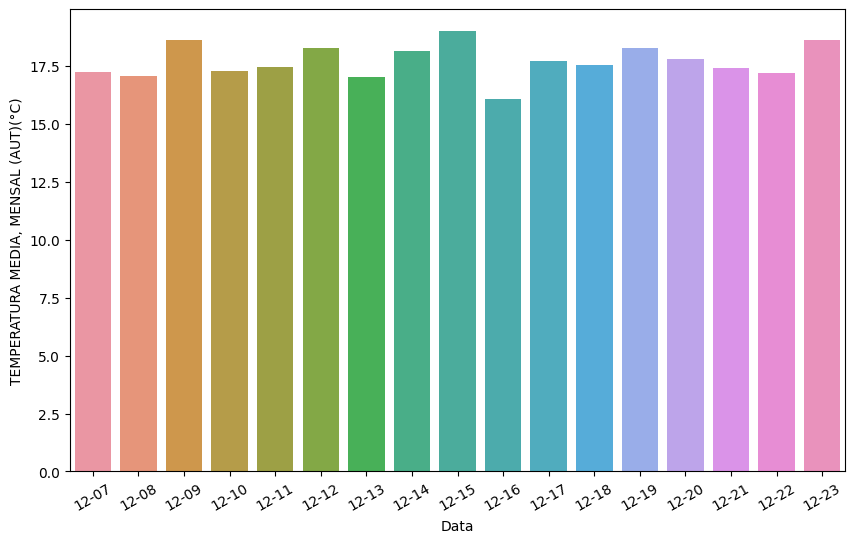

In [ ]:
# @title
plt.figure(figsize=(10,6))
ax = sns.barplot(data=clima_por_ano,x=clima_por_ano.index,y="TEMPERATURA MEDIA, MENSAL (AUT)(°C)")
plt.xticks(rotation=30)
plt.show

## Subplot comparativo entre condições climáticas

In [ ]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
import locale


# Configurar o locale para inglês nos Estados Unidos
#locale.setlocale(locale.LC_TIME, 'en_US.utf8')

# Criar uma figura e subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # 1 linha e 2 colunas de subplots

# Subplot 1
axs[0].bar(clima_por_ano.index, clima_por_ano['NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)'], color='b')
axs[0].set_title('Número de dias com chuva')
axs[0].set_ylabel('dias')
axs[0].tick_params(axis='x', rotation=90, labelsize=8)
#axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))  # Formato "mmm-yy"
#axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Intervalo de 1 mês


# Subplot 2
axs[1].bar(clima_por_ano.index, clima_por_ano['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], color='b')
axs[1].set_title('Precipitação Total (mm)')
axs[1].set_ylabel('precipitação (mm)')
axs[1].tick_params(axis='x', rotation=90, labelsize=8)
#axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))  # Formato "mmm-yy"
#axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Intervalo de 1 mês

# Subplot 3
axs[2].bar(clima_por_ano.index, clima_por_ano['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], color='b')
axs[2].set_title('Temperatura Média (°C)')
axs[2].set_ylabel('temperatura média (°C)')
axs[2].tick_params(axis='x', rotation=90, labelsize=8)
#axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))  # Formato "mmm-yy"
#axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Intervalo de 1 mês

# Ajustar o layout para evitar sobreposição de rótulos
plt.tight_layout()


# Exibir os gráficos
plt.show()


# Comparativo entre Produtos Produzidos ao longo do tempo

In [ ]:
##Dados producao
dados_producao = pd.read_csv('Producao.csv', sep = ';')
dados_producao = dados_producao.drop('id', axis=1)
dados_producao = dados_producao.set_index('produto')
dados_producao = dados_producao.T
dados_producao.dropna(inplace=True)
dados_producao.head()

produto,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINÍFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra líquida,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,3847673,0,0,0,0,0,0,0,0,0
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,3565644,0,0,0,0,0,0,0,0,0
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,3015037,0,0,0,0,0,0,0,0,0
1973,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,...,3559922,0,0,0,0,0,0,0,0,0
1974,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,...,5136979,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculando a soma total
vinho_mesa = dados_producao["VINHO DE MESA"]
derivados = dados_producao["DERIVADOS"]
vinho_fino = dados_producao["VINHO FINO DE MESA (VINÍFERA)"]
suco = dados_producao["SUCO"]

dados_producao['Total'] = vinho_mesa + derivados + vinho_fino + suco
#dados_producao['Total por Coluna'] = soma_por_coluna
dados_producao.head()



produto,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINÍFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados,Total
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,0,0,0,0,0,0,0,0,0,256370050
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,0,0,0,0,0,0,0,0,0,193427885
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,0,0,0,0,0,0,0,0,0,183856017
1973,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,...,0,0,0,0,0,0,0,0,0,157396674
1974,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,...,0,0,0,0,0,0,0,0,0,273424403


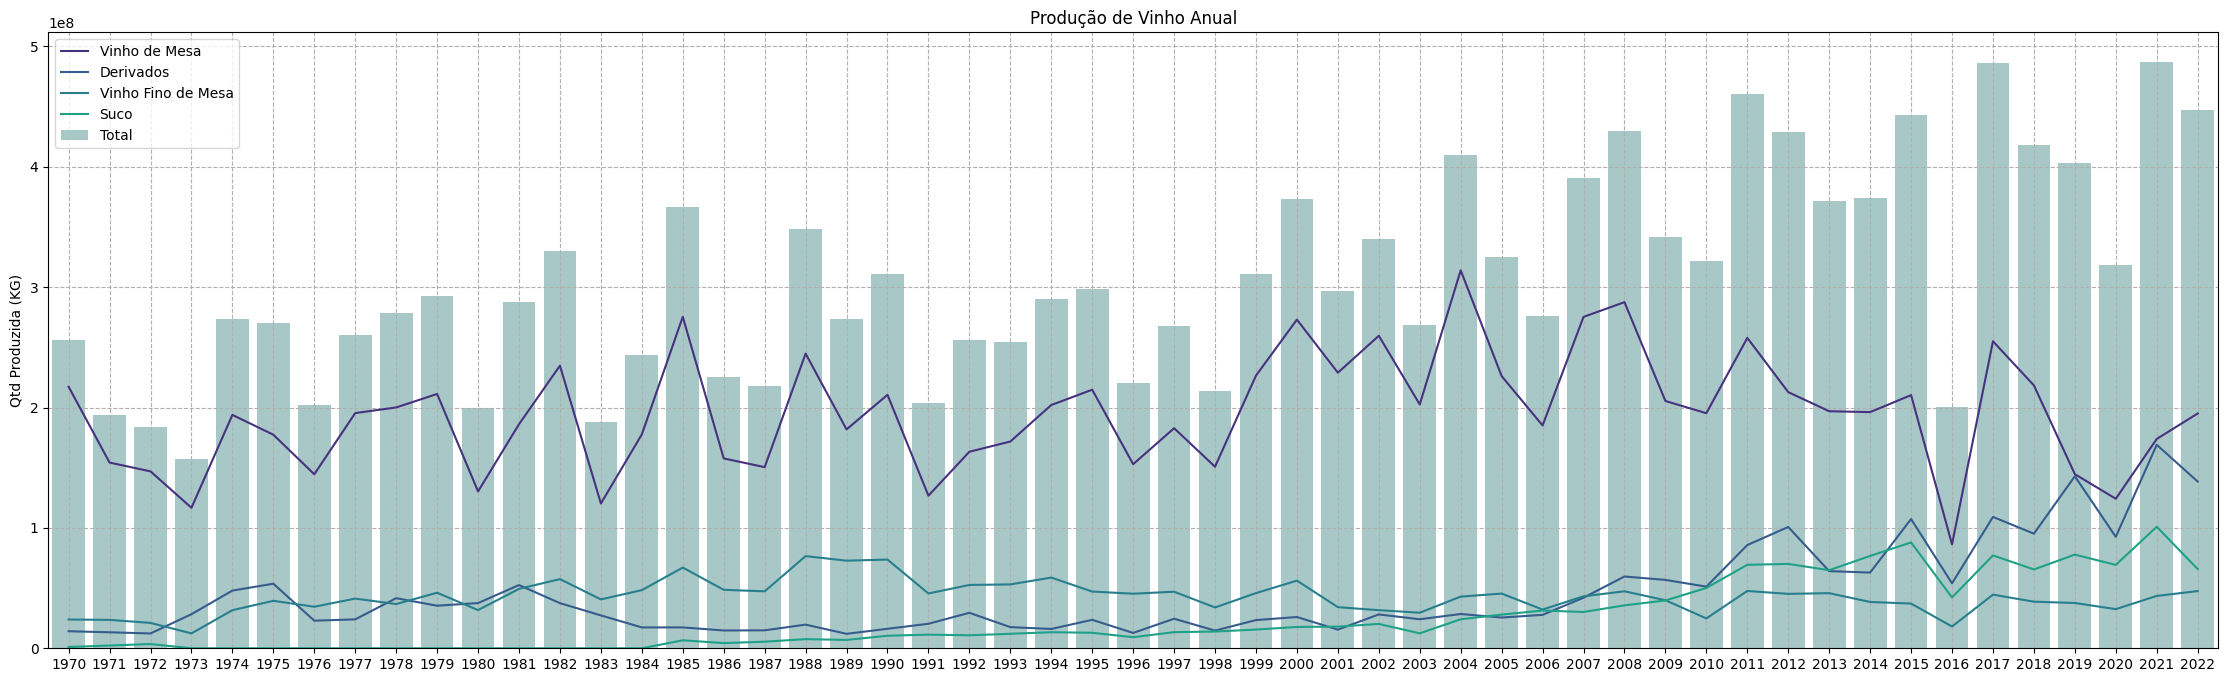

In [ ]:
plt.figure(figsize = (28,8))
ax = sns.lineplot(data=dados_producao, x=dados_producao.index, y="VINHO DE MESA", label="Vinho de Mesa")
ax = sns.lineplot(data=dados_producao, x=dados_producao.index, y="DERIVADOS", label="Derivados")
ax = sns.lineplot(data=dados_producao, x=dados_producao.index, y="VINHO FINO DE MESA (VINÍFERA)", label="Vinho Fino de Mesa")
ax = sns.lineplot(data=dados_producao, x=dados_producao.index, y="SUCO", label="Suco")
colors = ["#A2CDCB"]
ax = sns.barplot(data=dados_producao, x=dados_producao.index, y="Total", label="Total", palette=colors)
ax.set_ylabel("Qtd Produzida (KG)")
plt.grid(linestyle="--")
plt.title("Produção de Vinho Anual")
ax.legend()

plt.show()

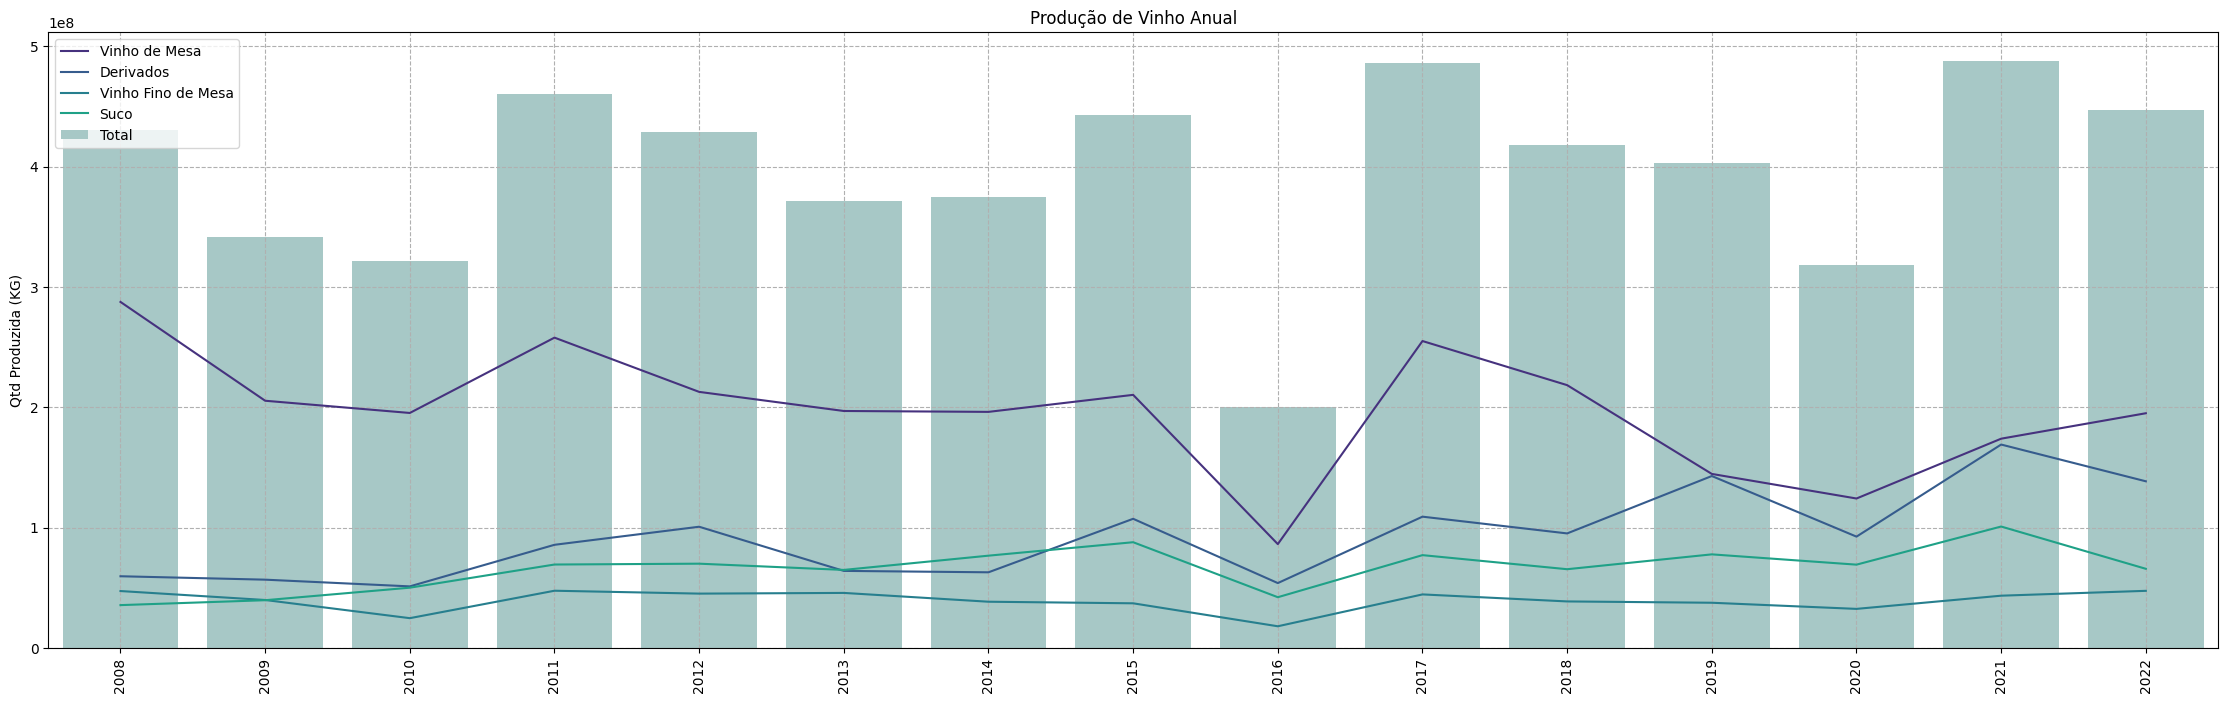

In [ ]:
### TESTE RECORDE APENAS PARA VISUALIZAÇÃO
plt.figure(figsize = (28,8))
ax = sns.lineplot(data=dados_producao[-15:], x=dados_producao[-15:].index, y="VINHO DE MESA", label="Vinho de Mesa")
ax = sns.lineplot(data=dados_producao[-15:], x=dados_producao[-15:].index, y="DERIVADOS", label="Derivados")
ax = sns.lineplot(data=dados_producao[-15:], x=dados_producao[-15:].index, y="VINHO FINO DE MESA (VINÍFERA)", label="Vinho Fino de Mesa")
ax = sns.lineplot(data=dados_producao[-15:], x=dados_producao[-15:].index, y="SUCO", label="Suco")
colors = ["#A2CDCB"]
ax = sns.barplot(data=dados_producao[-15:], x=dados_producao[-15:].index, y="Total", label="Total", palette=colors)
plt.xticks(rotation=90)
ax.set_ylabel("Qtd Produzida (KG)")
plt.grid(linestyle="--")
plt.title("Produção de Vinho Anual")
ax.legend()

plt.show()

In [ ]:

# Seleciona a linha que contém o ano 2016
linha_2016 = dados_producao[dados_producao.index == '2016']
linha_2015 = dados_producao[dados_producao.index == '2015']

# Formate os valores com separador de milhares e imprima
print("Total 2016: {:,.0f}".format(linha_2016['Total'].values[0]))
print("Total 2015: {:,.0f}".format(linha_2015['Total'].values[0]))
queda = linha_2016['Total'].values[0] / linha_2015['Total'].values[0]

print(queda)
#dados_producao.info()

Total 2016: 200,550,344
Total 2015: 442,701,714
0.453014609290625


In [ ]:
# Calcule a correlação entre 'Producao' e 'Temperatura'
correlacao = dados_producao['Total'].corr(clima_por_ano['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'])

In [ ]:
data = {'produto': ['Produto A', 'Produto B', 'Produto C'],
        'Janeiro': [100, 200, 300],
        'Fevereiro': [150, 250, 350],
        'Março': [200, 300, 400]}

data = pd.DataFrame(data)
soma_por_linha = data.sum(axis=0)
soma_por_coluna = data.sum(axis=1)
soma_por_linha
soma_por_coluna
data["Total"] = soma_por_coluna
data.head()

# Exportação de Vinho

In [5]:
dados= pd.read_csv("ExpVinho (2).csv",sep = ';', header= 0, skiprows = 0)
dados['País'] = dados['País'].str.replace('Alemanha, República Democrática', 'Alemanha')
dados.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,Alemanha,0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Formatando a Tabela conforme Requisitado no Tech Challenge
dados_3 = dados.set_index('País').drop('Id', axis = 1)
for i in range(0, len(dados_3.columns)):
    column_name = dados_3.columns[i]
    if '.1' in column_name:
        new_name = column_name.replace('.1', '.USD')
        dados_3.rename(columns={column_name: new_name}, inplace=True)
    if '.1' not in column_name:
        new_name = column_name + '.L'
        dados_3.rename(columns={column_name: new_name}, inplace=True)


In [7]:
# Tabela formatada conforme item 4 do Tech
dados_4 = dados_3.iloc[:,-30:]
dados_4

,2008.L,2008.USD,2009.L,2009.USD,2010.L,2010.USD,2011.L,2011.USD,2012.L,2012.USD,...,2018.L,2018.USD,2019.L,2019.USD,2020.L,2020.USD,2021.L,2021.USD,2022.L,2022.USD
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
Alemanha,265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
Uruguai,0,0,0,0,914,2929,1238,4404,1135,3879,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0


## Valor de venda de vinho do RS nos últimos 15 anos

In [8]:
#Separando os dados de valor de venda de vinho do Rio Grande do SUl nos ultimos 15 anos separados por pais exportador
dados_preco = dados.iloc[:, 1::2]
dados_preco = dados_preco.set_index('País')
preco_15 = dados_preco.iloc[:,-15:]
preco_15['total'] = preco_15.sum(axis = 1)
preco_top_10 = preco_15.sort_values('total', ascending= False).head(10)
preco_top_10.head(5)



,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,total
País,,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,38719031
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,25504484
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,9684567
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,4746525
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,4711464


In [9]:
total_valor_vendas_15_anos = preco_15['total'].sum()
total_valor_vendas_15_anos

112644316

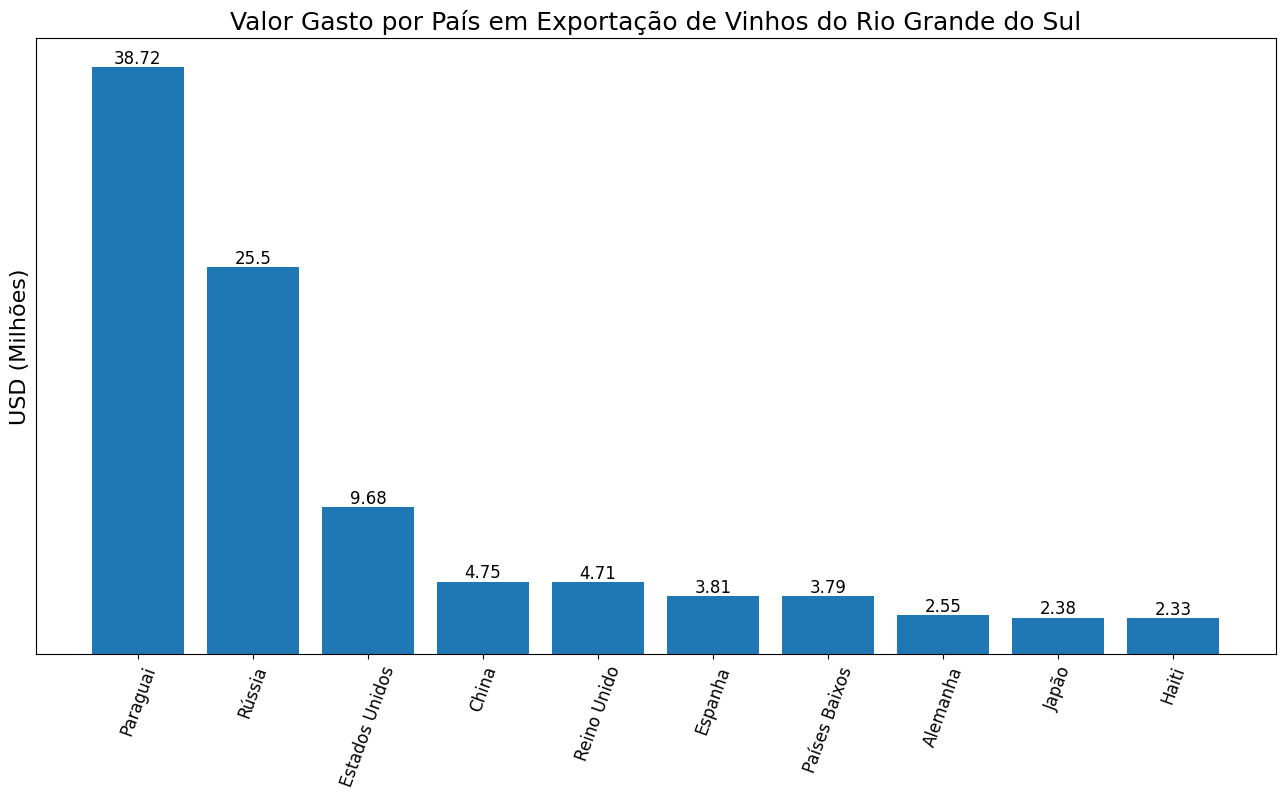

In [10]:
# oportunidade: vendemos para o paraguai por um preço mais lucrativo em comparação com a Russía
# venda para o Haiti não é tão lucrativa pois é o sexto país que mais compra, pórem apenas o décimo que traz mais receita
plt.figure(figsize = (16,8))
ax = sns.barplot(y=preco_top_10['total'] / 1000000, x=preco_top_10.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize = 12)

bars = ax.bar(x=preco_top_10.index, height=(preco_top_10['total'] / 1000000).round(2))

plt.title('Valor Gasto por País em Exportação de Vinhos do Rio Grande do Sul', fontsize=18)

plt.xlabel (None)

plt.ylabel ('USD (Milhões)', fontsize = 16)
ax.bar_label(bars, fontsize = 12)
ax.set_yticks([])
plt.show()


In [11]:
fig = go.Figure()
fig.update_xaxes (title_text = 'Ano')
fig.update_layout(
    plot_bgcolor='azure',
    width=1600,  # Largura de 1600 pixels
    height=800,  # Altura de 800 pixels
)
fig.update_yaxes (title_text = 'Valor das vendas')
fig.add_trace(go.Scatter(y = preco_top_10.drop('total',axis=1).T['Rússia'], x =preco_top_10.drop('total',axis=1).T.index, name = 'Rússia' ))
fig.add_trace(go.Scatter(y = preco_top_10.drop('total',axis=1).T['Paraguai'], x =preco_top_10.drop('total',axis=1).T.index, name = 'Paraguai' ))
fig.add_trace(go.Scatter(y = preco_top_10.drop('total',axis=1).T['Estados Unidos'], x =preco_top_10.drop('total',axis=1).T.index, name = 'Estados Unidos' ))
fig.add_trace(go.Scatter(y = preco_top_10.drop('total',axis=1).T['China'], x =preco_top_10.drop('total',axis=1).T.index, name = 'China' ))
fig.add_trace(go.Scatter(y = preco_top_10.drop('total',axis=1).T['Espanha'], x =preco_top_10.drop('total',axis=1).T.index, name = 'Espanha'))
fig.update_layout(title='Top 5 Países Cujo Brasil Mais Faturou Com Vendas Por Ano - Valor Em Milhões De Dólares')

In [12]:
#Valor em dolares de vinho do Rio Grande do Sul exportado nos ultimos 15 anos
vendido_anual_dolares = preco_15.drop('total', axis = 1).sum(axis = 0)
vendido_anual_dolares = pd.DataFrame(vendido_anual_dolares)
vendido_anual_dolares = vendido_anual_dolares.reset_index()
vendido_anual_dolares = vendido_anual_dolares.rename(columns={'index':'Ano', 0:'Valor (Milhões)'})
vendido_anual_dolares['Ano'] = vendido_anual_dolares['Ano'].str.replace('\.1','').astype(int)

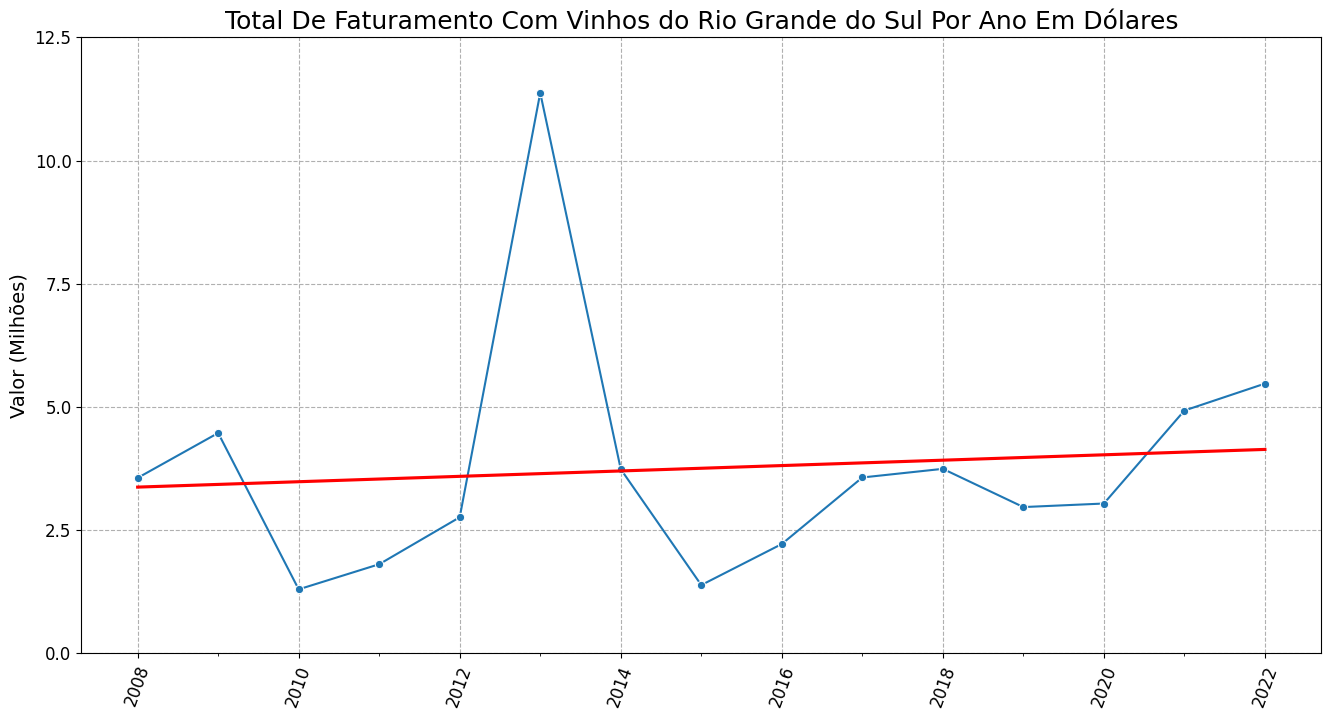

In [13]:
#2013 foi o ano que trouxe mais receita, custo médio aumentou em relação aos anos anteriores, vito que 2009 foi o ano com mais vendas
plt.figure(figsize = (16,8))
ax  = sns.lineplot(data = vendido_anual_dolares, y = vendido_anual_dolares['Valor (Milhões)']/1000000, x = 'Ano', marker = 'o')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 70, fontsize = 12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_xticks(vendido_anual_dolares['Ano'], minor = True)
ax = sns.regplot(data = vendido_anual_dolares, y = vendido_anual_dolares['Valor (Milhões)']/1000000, x = 'Ano', ci = None , color = 'red' , scatter = False)
ax.set_xticks(vendido_anual_dolares['Ano'], minor = True)
ax.set_ylim(0,25)
plt.grid(linestyle="--")
plt.title ('Total De Faturamento Com Vinhos do Rio Grande do Sul Por Ano Em Dólares', fontsize = 18)
plt.ylabel('Valor (Milhões)', fontsize= 14)
plt.xlabel(None)
plt.show()

## Quantidade de vinho do RS exportado nos últimos 15 anos

In [14]:
#Separando os dados de quantidade de vinho do Rio Grande do SUl nos ultimos 15 anos separados por pais exportador
dados_quantidade = dados.iloc[:, 0::2]
dados_quantidade['País'] = dados_preco.index
dados_quantidade = dados_quantidade.drop('Id', axis = 1)
dados_quantidade = dados_quantidade.set_index('País')
quantidade_15 = dados_quantidade.iloc[:,-15:]
quantidade_15['total'] = quantidade_15.sum(axis=1)
quantidade_top_10 = quantidade_15.sort_values('total', ascending= False).head(10)
quantidade_top_10.head(3)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,total
País,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,39029799
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,29214770
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,3563355


In [15]:
quantidade_15['total'].sum()

87982432

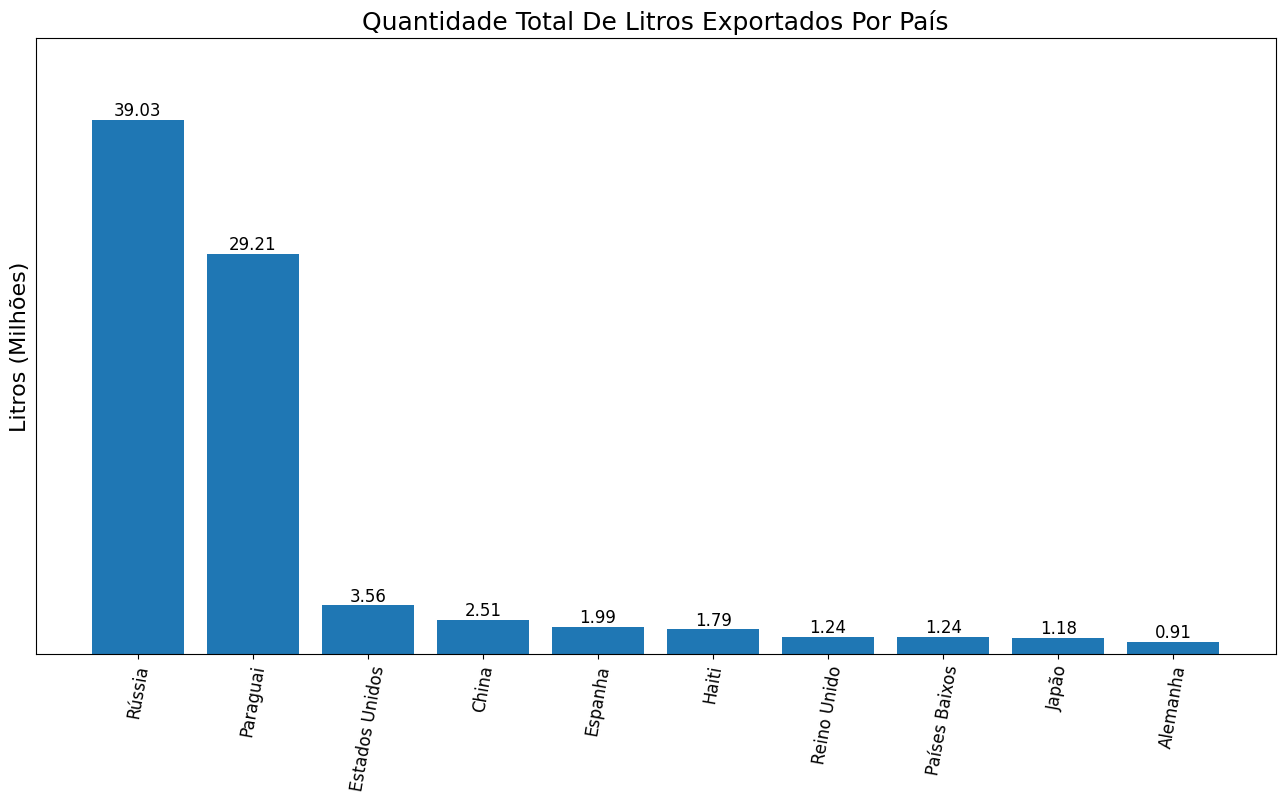

In [16]:
plt.figure(figsize = (16,8))
ax = sns.barplot(y=quantidade_top_10['total']/1000000, x=quantidade_top_10.index)
bars = ax.bar(x=quantidade_top_10.index, height=(quantidade_top_10['total'] / 1000000).round(2))
ax.bar_label(bars, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 80, fontsize = 12)
ax.set_ylim(0,45)
plt.ylabel ('Litros (Milhões)', fontsize = 16)
plt.title ('Quantidade Total De Litros Exportados Por País', fontsize = 18)
plt.xlabel (None)
ax.set_yticks([])
plt.show()

In [17]:
fig = go.Figure()
fig.update_layout(
    width=1600,  # Largura de 1600 pixels
    height=800,  # Altura de 800 pixels
)
fig.update_xaxes (None, tickfont=dict(size=16) )
fig.update_yaxes (title_text = 'Litros',  tickfont=dict(size=14))
fig.add_trace(go.Scatter(y = quantidade_top_10.drop('total',axis=1).T['Rússia'], x =quantidade_top_10.drop('total',axis=1).T.index, name = 'Rússia' ))
fig.add_trace(go.Scatter(y = quantidade_top_10.drop('total',axis=1).T['Paraguai'], x =quantidade_top_10.drop('total',axis=1).T.index, name = 'Paraguai' ))
fig.add_trace(go.Scatter(y = quantidade_top_10.drop('total',axis=1).T['Estados Unidos'], x =quantidade_top_10.drop('total',axis=1).T.index, name = 'Estados Unidos' ))
fig.add_trace(go.Scatter(y = quantidade_top_10.drop('total',axis=1).T['China'], x =quantidade_top_10.drop('total',axis=1).T.index, name = 'China' ))
fig.add_trace(go.Scatter(y = quantidade_top_10.drop('total',axis=1).T['Espanha'], x =quantidade_top_10.drop('total',axis=1).T.index, name = 'Espanha'))
fig.update_layout(title='Top 5 Países Compradores De Vinho Do Brasil - Quantidade Vendida em Milhões',title_font=dict(size=18) )

In [18]:
#Quantidade de vinho do Rio Grande do Sul exportado nos ultimos 15 anos
vendido_anual_quantidade = quantidade_15.drop('total', axis = 1).sum(axis = 0)
vendido_anual_quantidade = pd.DataFrame(vendido_anual_quantidade)
vendido_anual_quantidade = vendido_anual_quantidade.reset_index()
vendido_anual_quantidade = vendido_anual_quantidade.rename(columns={'index':'Ano', 0:'Quantidade'})
vendido_anual_quantidade['Ano'] = vendido_anual_quantidade['Ano'].astype(int)

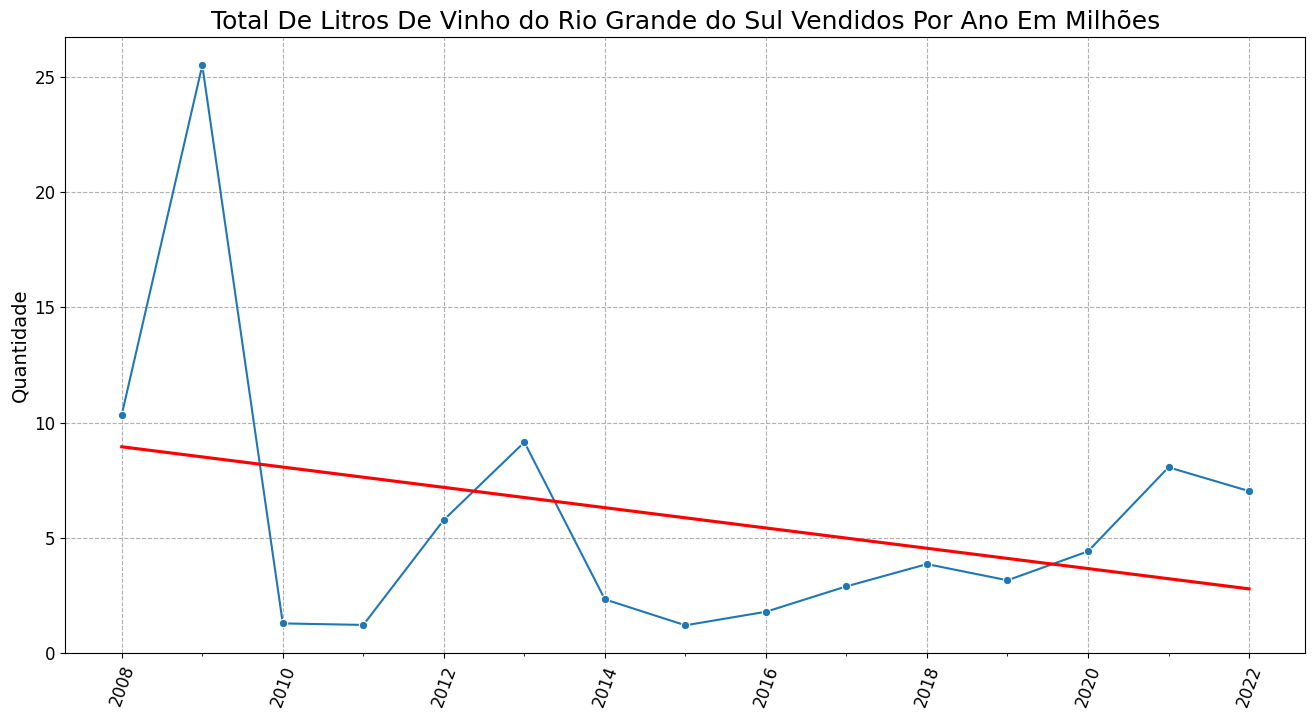

In [19]:
# oportunidade de négocio: enetender pq em 2009 as vendas foram tão altas
plt.figure(figsize = (16,8))
ax  = sns.lineplot(data = vendido_anual_quantidade, y =vendido_anual_quantidade['Quantidade']/1000000 , x = 'Ano',marker='o')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 70,fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_xticks(vendido_anual_quantidade['Ano'], minor = True)
ax = sns.regplot(data = vendido_anual_quantidade[:], y = vendido_anual_quantidade['Quantidade']/1000000, x = 'Ano',  ci = None , color = 'red', scatter = False)
plt.title ('Total De Litros De Vinho do Rio Grande do Sul Vendidos Por Ano Em Milhões', fontsize = 18)
plt.xlabel(None)
plt.ylabel('Quantidade', fontsize= 14)
plt.grid(linestyle="--")
plt.show()


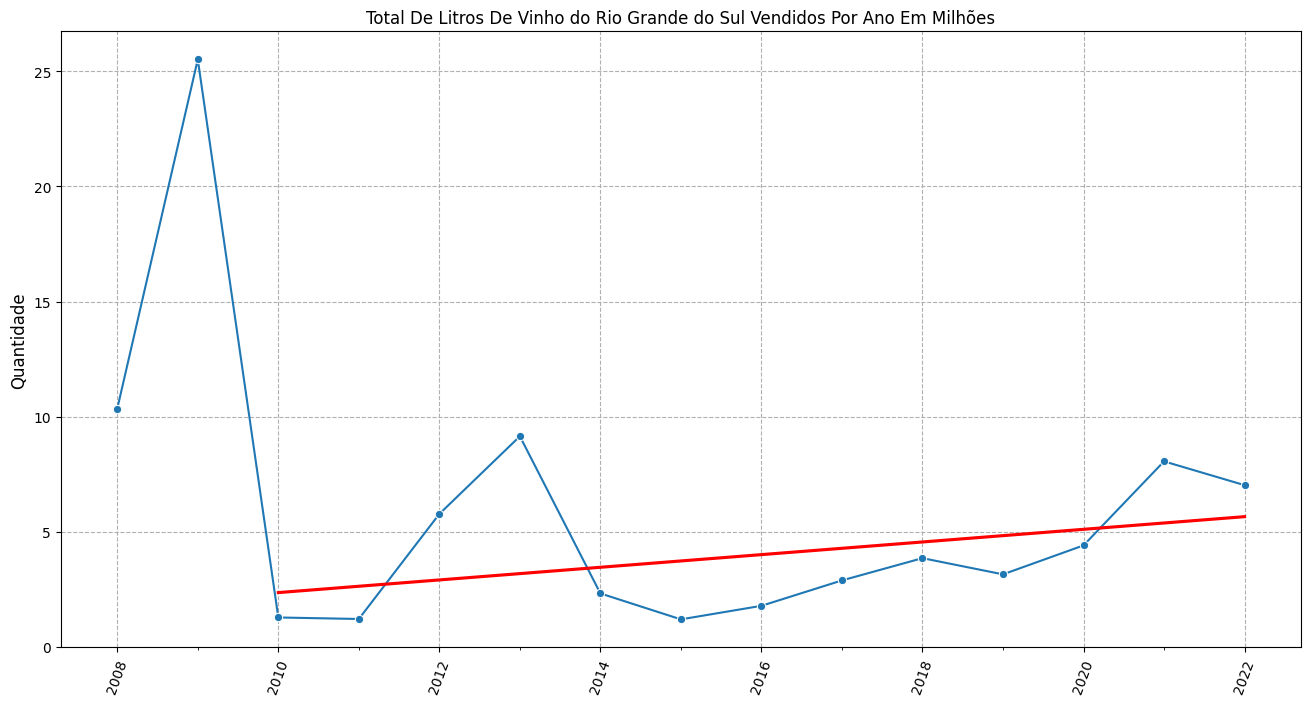

In [20]:
# não entendi a diferença deste para o de cima
# A ideia era mais para a analise da regressão que por causa do outlier de 2009 pode parecer que o mercado não esta em uma crescrente, o que pode-se dizer que não é verdadee se realizar uma regressão posterior ou outlier
plt.figure(figsize = (16,8))
ax  = sns.lineplot(data = vendido_anual_quantidade, y = vendido_anual_quantidade['Quantidade']/1000000, x = 'Ano', marker = 'o')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 70)
ax.set_xticks(vendido_anual_quantidade['Ano'], minor = True)
ax = sns.regplot(data = vendido_anual_quantidade[-13:], y = vendido_anual_quantidade['Quantidade'][-13:]/1000000, x = 'Ano', ci = None , color = 'red', scatter = False)
plt.title ('Total De Litros De Vinho do Rio Grande do Sul Vendidos Por Ano Em Milhões')
plt.grid(linestyle="--")
plt.ylabel('Quantidade', fontsize= 12)
plt.xlabel(None)
plt.show()

#Populacão

In [21]:
from io import StringIO

In [22]:
dados_da_populacao = """
Posição	País (ou território dependente)	Estimativa da ONU	Data	Estimativa Oficial
1	 Índia	1 429 921 746	2023	Estimativa oficial
2	 China	1 426 391 281	2023	Censo oficial
3	 Estados Unidos	339 987 103	2023	Censo oficial
4	 Indonésia	277 184 719	2023	Estimativa oficial
5	 Paquistão	240 215 932	2023	Estimativa oficial
6	 Nigéria	223 899 057	2023	Estimativa oficial
7	 Brasil	203 062 512	2022	Censo oficial
8	 Bangladesh	172 452 382	2023	Estimativa oficial
9	 Rússia	148 221 749	2023	Estimativa oficial
10	 México	134 127 189	2023	Estimativa oficial
11	 Etiópia	125 092 825	2023	Estimativa oficial
12	 Japão	124 127 899	2023	Estimativa oficial
13	 Filipinas	109 581 078	2020	Estimativa oficial
14	 Egito	102 334 404	2020	Estimativa oficial
15	 Vietname	97 338 579	2020	Estimativa oficial
16	 República Democrática do Congo	89 561 403	2020	Estimativa oficial
17	 Turquia	84 339 067	2020	Estimativa oficial
18	 Irã	83 992 949	2020	Estimativa oficial
19	 Alemanha	83 783 942	2020	Estimativa oficial
20	 Tailândia	69 799 978	2020	Estimativa oficial
21	 Reino Unido	67 886 011	2020	Estimativa oficial
22	 França	65 273 511	2020	Estimativa oficial
23	 Itália	60 461 826	2020	Estimativa oficial
24	 Tanzânia	59 734 218	2020	Estimativa oficial
25	 África do Sul	59 308 690	2020	Estimativa oficial
26	 Myanmar	54 409 800	2020	Estimativa oficial
27	 Quénia	53 771 296	2020	Estimativa oficial
28	 Coreia do Sul	51 269 185	2020	Estimativa oficial
29	 Colômbia	50 882 891	2020	Estimativa oficial
30	 Espanha	46 754 778	2020	Estimativa oficial
31	 Uganda	45 741 007	2020	Estimativa oficial
32	 Argentina	45 195 774	2020	Estimativa oficial
33	 Argélia	43 851 044	2020	Estimativa oficial
34	 Sudão	43 849 260	2020	Estimativa oficial
35	 Ucrânia	43 733 762	2020	Estimativa oficial
36	 Iraque	40 222 493	2020	Estimativa oficial
37	 Afeganistão	38 928 346	2020	Estimativa oficial
38	 Polónia	37 846 611	2020	Estimativa oficial
39	 Canadá	37 742 154	2020	Estimativa oficial
40	 Marrocos	36 910 560	2020	Estimativa oficial
41	 Arábia Saudita	34 813 871	2020	Estimativa oficial
42	 Uzbequistão	33 469 203	2020	Estimativa oficial
43	 Peru	32 971 854	2020	Estimativa oficial
44	 Angola	32 866 272	2020	Estimativa oficial
45	 Malásia	32 365 999	2020	Estimativa oficial
46	 Moçambique	31 255 435	2020	Estimativa oficial
47	 Gana	31 072 940	2020	Estimativa oficial
48	 Iémen	29 825 968	2020	Estimativa oficial
49	 Nepal	29 136 808	2020	Estimativa oficial
50	 Venezuela	28 435 940	2020	Estimativa oficial
51	 Madagascar	27 691 018	2020	Estimativa oficial
52	 Camarões	26 545 864	2020	Estimativa oficial
53	 Costa do Marfim	26 378 274	2020	Estimativa oficial
54	 Coreia do Norte	25 778 816	2020	Estimativa oficial
55	 Austrália	25 499 884	2020	Estimativa oficial
56	 Níger	24 206 644	2020	Estimativa oficial
–	 Taiwan	23 816 775	2020	Estimativa oficial
57	 Sri Lanka	21 413 249	2020	Estimativa oficial
58	 Burquina Fasso	20 903 273	2020	Estimativa oficial
59	 Mali	20 250 833	2020	Estimativa oficial
60	 Roménia	19 237 691	2020	Estimativa oficial
61	 Malawi	19 129 952	2020	Estimativa oficial
62	 Chile	19 116 201	2020	Estimativa oficial
63	 Cazaquistão	18 776 707	2020	Estimativa oficial
64	 Zâmbia	18 383 955	2020	Estimativa oficial
65	 Guatemala	17 915 568	2020	Estimativa oficial
66	 Equador	17 643 054	2020	Estimativa oficial
67	 Síria	17 500 657	2020	Estimativa oficial
68	 Países Baixos	17 134 872	2020	Estimativa oficial
69	 Senegal	16 743 927	2020	Estimativa oficial
70	 Camboja	16 718 965	2020	Estimativa oficial
71	 Chade	16 425 864	2020	Estimativa oficial
72	 Somália	15 893 222	2020	Estimativa oficial
73	 Zimbabwe	14 862 924	2020	Estimativa oficial
74	 Guiné	13 132 795	2020	Estimativa oficial
75	 Ruanda	12 952 218	2020	Estimativa oficial
76	 Benim	12 123 000	2020	Estimativa oficial
77	 Burundi	11 890 784	2020	Estimativa oficial
78	 Tunísia	11 818 619	2020	Estimativa oficial
79	 Bolívia	11 673 021	2020	Estimativa oficial
80	 Bélgica	11 589 623	2020	Estimativa oficial
81	 Haiti	11 402 528	2020	Estimativa oficial
82	 Cuba	11 326 616	2020	Estimativa oficial
83	 Sudão do Sul	11 193 725	2020	Estimativa oficial
84	 República Dominicana	10 847 910	2020	Estimativa oficial
85	 Chéquia	10 708 981	2020	Estimativa oficial
86	 Grécia	10 423 054	2020	Estimativa oficial
87	 Portugal	10 344 802	2021	Censo oficial
88	 Jordânia	10 203 134	2020	Estimativa oficial
89	 Azerbaijão	10 139 177	2020	Estimativa oficial
90	 Suécia	10 099 265	2020	Estimativa oficial
91	 Honduras	9 904 607	2020	Estimativa oficial
92	 Emirados Árabes Unidos	9 890 402	2020	Estimativa oficial
93	 Hungria	9 660 351	2020	Estimativa oficial
94	 Tajiquistão	9 537 645	2020	Estimativa oficial
95	 Bielorrússia	9 449 323	2020	Estimativa oficial
96	 Áustria	9 006 398	2020	Estimativa oficial
97	 Papua-Nova Guiné	8 947 024	2020	Estimativa oficial
98	 Israel	8 655 535	2020	Estimativa oficial
99	 Suíça	8 654 622	2020	Estimativa oficial
100	 Togo	8 278 724	2020	Estimativa oficial
101	 Serra Leoa	7 976 983	2020	Estimativa oficial
–	 Hong Kong (China)	7 496 981	2020	Estimativa oficial
102	 Laos	7 275 560	2020	Estimativa oficial
103	 Bulgária	6 948 445	2020	Estimativa oficial
104	 Sérvia	6 926 705	2020	Estimativa oficial
105	 Líbia	6 871 292	2020	Estimativa oficial
106	 Líbano	6 825 445	2020	Estimativa oficial
107	 Nicarágua	6 624 554	2020	Estimativa oficial
108	 Quirguistão	6 524 195	2020	Estimativa oficial
109	 El Salvador	6 486 205	2020	Estimativa oficial
110	 Paraguai	6 109 644	2022	Censo oficial
111	 Turquemenistão	6 031 200	2020	Estimativa oficial
112	 Singapura	5 850 342	2020	Estimativa oficial
113	 Dinamarca	5 792 202	2020	Estimativa oficial
114	 Finlândia	5 540 720	2020	Estimativa oficial
115	 Congo	5 518 087	2020	Estimativa oficial
116	 Eslováquia	5 459 642	2020	Estimativa oficial
117	 Noruega	5 421 241	2020	Estimativa oficial
118	 Omã	5 106 626	2020	Estimativa oficial
119	 Palestina	5 101 414	2020	Estimativa oficial
120	 Costa Rica	5 094 118	2020	Estimativa oficial
121	 Libéria	5 057 681	2020	Estimativa oficial
122	 Irlanda	4 937 786	2020	Estimativa oficial
123	 República Centro-Africana	4 829 767	2020	Estimativa oficial
124	 Nova Zelândia	4 822 233	2020	Estimativa oficial
125	 Mauritânia	4 649 658	2020	Estimativa oficial
126	 Panamá	4 314 767	2020	Estimativa oficial
127	 Kuwait	4 270 571	2020	Estimativa oficial
128	 Croácia	4 105 267	2020	Estimativa oficial
129	 Geórgia	3 989 167	2020	Estimativa oficial
130	 Eritreia	3 546 421	2020	Estimativa oficial
131	 Uruguai	3 473 730	2020	Estimativa oficial
132	 Bósnia e Herzegovina	3 280 819	2020	Estimativa oficial
133	 Mongólia	3 278 290	2020	Estimativa oficial
134	 Arménia	2 963 243	2020	Estimativa oficial
135	 Jamaica	2 961 167	2020	Estimativa oficial
136	 Catar	2 881 053	2020	Estimativa oficial
137	 Albânia	2 877 797	2020	Estimativa oficial
–	 Porto Rico (Estados Unidos)	2 860 853	2020	Estimativa oficial
138	 Lituânia	2 722 289	2020	Estimativa oficial
139	 Moldávia	2 640 438	2020	Estimativa oficial
140	 Namíbia	2 540 905	2020	Estimativa oficial
141	 Gâmbia	2 416 668	2020	Estimativa oficial
142	 Botswana	2 351 627	2020	Estimativa oficial
143	 Gabão	2 225 734	2020	Estimativa oficial
144	 Lesoto	2 142 249	2020	Estimativa oficial
145	 Macedônia do Norte	2 083 374	2020	Estimativa oficial
146	 Eslovénia	2 078 938	2020	Estimativa oficial
147	 Guiné-Bissau	1 968 001	2020	Estimativa oficial
148	 Letónia	1 886 198	2020	Estimativa oficial
–	 Kosovo	1 795 666	2020	Estimativa oficial
149	 Bahrein	1 701 575	2020	Estimativa oficial
150	 Guiné Equatorial	1 402 985	2020	Estimativa oficial
151	 Trinidad e Tobago	1 399 488	2020	Estimativa oficial
152	 Estónia	1 326 335	2020	Estimativa oficial
153	 Timor-Leste	1 318 445	2020	Estimativa oficial
154	 Maurícia	1 271 768	2020	Estimativa oficial
155	 Eswatini	1 160 164	2020	Estimativa oficial
156	 Djibouti	988 000	2020	Estimativa oficial
157	 Chipre	900 432	2020	Estimativa oficial
158	 Fiji	896 445	2020	Estimativa oficial
–	 Reunião (França)	895 312	2020	Estimativa Oficial
159	 Comores	869 601	2020	Estimativa oficial
160	 Guiana	786 552	2020	Estimativa oficial
161	 Butão	771 608	2020	Estimativa oficial
162	 Ilhas Salomão	686 884	2020	Estimativa oficial
–	 Macau (China)	649 335	2020	Estimativa oficial
163	 Montenegro	649 335	2020	Estimativa oficial
164	 Luxemburgo	625 978	2020	Estimativa oficial
–	 Saara Ocidental (Marrocos)	597 339	2019	Estimativa oficial
165	 Suriname	586 632	2020	Estimativa oficial
166	 Cabo Verde	555 987	2020	Estimativa oficial
167	 Maldivas	540 544	2020	Estimativa oficial
168	 Malta	441 543	2020	Estimativa oficial
–	 Transnístria (Moldávia)	469 000	2020	Estimativa oficial
169	 Brunei	437 479	2020	Estimativa oficial
–	 Guadalupe (França)	400 124	2020	Estimativa Oficial[2]
170	 Belize	397 628	2020	Estimativa oficial
171	 Bahamas	393 244	2020	Estimativa oficial
–	 Martinica (França)	375 265	2020	Estimativa Oficial [3]
–	 República Turca de Chipre do Norte (Chipre)	351 965	2020	Estimativa oficial
172	 Islândia	341 243	2020	Estimativa oficial
173	 Vanuatu	307 145	2020	Estimativa oficial
–	 Guiana Francesa (França)	298 682	2020	Estimativa oficial [4]
174	 Barbados	287 375	2020	Estimativa oficial
–	 Nova Caledônia (França)	285 498	2020	Estimativa oficial
–	 Polinésia Francesa (França)	280 908	2020	Estimativa oficial
–	 Mayotte (França)	272 815	2020	Estimativa oficial[5]
–	 Abecásia (Geórgia)	245 424	2020	Estimativa oficial
175	 São Tomé e Príncipe	219 159	2020	Estimativa oficial
176	 Samoa	198 414	2020	Estimativa oficial
177	 Santa Lúcia	183 627	2020	Estimativa oficial
–	 Guam (Estados Unidos)	168 775	2020	Estimativa oficial
–	 Curaçau (Países Baixos)	164 093	2020	Estimativa oficial
178	 Kiribati	119 449	2020	Estimativa oficial
179	 Estados Federados da Micronésia	114 419	2020	Estimativa oficial
180	 Granada	112 523	2020	Estimativa oficial
181	 São Vicente e Granadinas	110 940	2020	Estimativa oficial
–	 Jersey (Reino Unido)	107 800	2020	Estimativa oficial
–	 Aruba (Países Baixos)	106 766	2020	Estimativa oficial
182	 Tonga	105 695	2020	Estimativa oficial
–	 U.S. Ilhas Virgens (Estados Unidos)	104 425	2020	Estimativa oficial
183	 Antígua e Barbuda	101 038	2023	Estimativa oficial
184	 Seicheles	100 499	2023	Estimativa oficial
–	 Ilha de Man (Reino Unido)	85 033	2020	Estimativa oficial
185	 Andorra	78 097	2023	Estimativa oficial
186	 Domínica	72 433	2023	Estimativa oficial
–	 Ilhas Cayman (Reino Unido)	65 722	2020	Estimativa oficial
–	 Guernsey (Reino Unido)	63 155	2020	Estimativa oficial
187	 Ilhas Marshall	63 098	2023	Estimativa oficial
-	 Bermudas (Reino Unido)	62 278	2020	Estimativa oficial
–	 Marianas Setentrionais (Estados Unidos)	57 559	2020	Estimativa oficial
–	 Ossétia do Sul (Geórgia)	57 095	2020	Estimativa oficial
–	 Gronelândia (Dinamarca)	56 770	2020	Estimativa oficial
–	 Samoa Americana (Estados Unidos)	55 191	2020	Estimativa oficial
188	 São Cristóvão e Nevis	54 543	2023	Estimativa oficial
–	 Ilhas Faroe (Dinamarca)	48 863	2020	Estimativa oficial
–	São Martinho (Países Baixos) São Martinho (Países Baixos)	42 876	2020	Estimativa oficial
189	 Mónaco	38 939	2023	Estimativa oficial
–	 Ilhas Turks e Caicos (Reino Unido)	38 717	2020	Estimativa oficial
190	Liechtenstein	38 949	2023	Estimativa oficial
-	São Martinho (França)	38 666	2020	Estimativa oficial
191	 San Marino	35 145	2023	Estimativa oficial
–	 Gibraltar (Reino Unido)	33 691	2020	Estimativa oficial
–	 Ilhas Virgens Britânicas (Reino Unido)	30 231	2020	Estimativa oficial
–	 Bonaire (Países Baixos)	20 915	2020	Estimativa oficial [6]
192	 Palau	18 276	2023	Estimativa oficial
–	 Ilhas Cook	17 564	2020	Estimativa oficial
–	 Anguila (Reino Unido)	15 003	2020	Estimativa oficial
193	 Tuvalu	12 012	2023	Estimativa oficial
–	 Wallis e Futuna (França)	11 239	2020	Estimativa oficial
194	 Nauru	11 030	2023	Estimativa oficial
–	 São Bartolomeu (França)	9 877	2020	Estimativa oficial
–	 São Pedro e Miquelão (França)	6 008	2016	Estimativa oficial
–	 Montserrat (Reino Unido)	4 992	2020	Estimativa oficial
–	 Santa Helena (território) do Reino Unido)	4 889	2020	Estimativa oficial
–	 Ilhas Malvinas (Reino Unido)	3 480	2020	Estimativa oficial
–	 Santo Eustáquio (Países Baixos)	3 139	2020	Estimativa Oficial [7]
–	 Território Britânico do Oceano Índico (UK)	3 000	2020	Estimativa oficial [8]
–	 Ilha Christmas (Austrália)	1 996	2020	Estimativa oficial
–	 Niue	1 626	2020	CIA World Factbook
–	 Saba (Países Baixos)	1 933	2020	Estimativa oficial [9]
–	 Ilha Norfolk (Austrália)	1 734	2020	Estimativa oficial
–	 Tokelau (NZ)	1 357	2020	Final Estimativa oficial
–	 Ilha de Ascensão (Reino Unido)	806	2021	Estimativa oficial[10]
195	 Vaticano	801	2020	Estimativa oficial
–	 Ilhas Cocos (Keeling) (Austrália)	573	2020	Estimativa oficial
–	Tristão da Cunha (Reino Unido)	241	2022	Estimativa oficial[11]
–	 Ilhas Pitcairn (Reino Unido)	40	2021	Estimativa oficial"""

In [23]:
# Tabela da População no Ultimo Senso disponivel no wikipedia
dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao = populacao.dropna()
populacao = populacao.drop(['Data', 'Estimativa Oficial', 'Posição'], axis = 1)
populacao.set_index('País (ou território dependente)')
populacao = populacao.rename(columns={'País (ou território dependente)':'País'})
populacao = populacao.reset_index(drop = True)
populacao['País'] = populacao['País'].str.strip()
populacao.iloc[18][0]

'Alemanha'

In [24]:
populacao.head(2)

,País,Estimativa da ONU
0,Índia,1 429 921 746
1,China,1 426 391 281


In [25]:
# Unindo a tabela de quantidade de vinho exportado do Rio Grande do Sul
vinhos_populacao_ultimo_senso = quantidade_15.reset_index().merge(populacao, on = 'País')
vinhos_populacao_ultimo_senso['Estimativa da ONU'] = vinhos_populacao_ultimo_senso['Estimativa da ONU'].str.replace(' ','').astype(int)
vinhos_populacao_ultimo_senso.head(2)

,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,total,Estimativa da ONU
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11,38928346
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0,30,59308690


In [26]:
# Unindo a tabela de quantidade de vinho exportado do Rio Grande do Sul
vinhos_populacao_ultimo_senso_valor = preco_15.reset_index().merge(populacao, on = 'País')
vinhos_populacao_ultimo_senso_valor['Estimativa da ONU'] = vinhos_populacao_ultimo_senso_valor['Estimativa da ONU'].str.replace(' ','').astype(int)
vinhos_populacao_ultimo_senso_valor.head(2)

,País,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,total,Estimativa da ONU
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,46,38928346
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0,116,59308690


### Valor de venda per capta de vinho

In [27]:
def calculo_gasto_medio_per_capta(df):
  gasto_medio_per_capta = df[['País','total','Estimativa da ONU']].copy()
  gasto_medio_per_capta['gasto_medio'] = gasto_medio_per_capta['total'] / 15
  gasto_medio_per_capta['gasto_medio_per_capta'] =  gasto_medio_per_capta['gasto_medio'] /gasto_medio_per_capta['Estimativa da ONU']
  pd.set_option('display.float_format', '{:.4f}'.format)
  gasto_medio_per_capta_top_10 = gasto_medio_per_capta.sort_values('gasto_medio_per_capta',ascending = False).head(10).reset_index(drop = True)
  return gasto_medio_per_capta_top_10
gasto_medio_per_capta_top_10= calculo_gasto_medio_per_capta(vinhos_populacao_ultimo_senso_valor)
gasto_medio_per_capta_top_10


,País,total,Estimativa da ONU,gasto_medio,gasto_medio_per_capta
0,Paraguai,38719031,6109644,2581268.7333,0.4225
1,Luxemburgo,369934,625978,24662.2667,0.0394
2,Uruguai,1219878,3473730,81325.2000,0.0234
3,Países Baixos,3791611,17134872,252774.0667,0.0148
4,Haiti,2327208,11402528,155147.2000,0.0136
5,Bahamas,76628,393244,5108.5333,0.0130
6,Rússia,25504484,148221749,1700298.9333,0.0115
7,Bélgica,1395226,11589623,93015.0667,0.0080
8,Malta,50749,441543,3383.2667,0.0077
9,Suíça,906264,8654622,60417.6000,0.0070


In [28]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=gasto_medio_per_capta_top_10['País'],
    y=gasto_medio_per_capta_top_10['gasto_medio_per_capta'],
    text=gasto_medio_per_capta_top_10['gasto_medio_per_capta'].round(2),
    textposition='outside',
    marker_color='purple',
))

fig.update_layout(
    xaxis=dict(tickangle=70),
    xaxis_title=None,
    yaxis_title='Gasto per Capita',
    title='Gasto Médio per Capita por país consumidor de Vinho do Rio Grande do Sul (Dolares)',
    plot_bgcolor='azure',
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    showlegend=False,
    width=1600,  # Largura de 1600 pixels
    height=800,  # Altura de 800 pixels
)

# Ativar o grid no eixo Y e definir o título do eixo Y
fig.update_yaxes(showgrid=True, title_text='Dolares', title_font=dict(size=14))
fig.update_yaxes(showticklabels=False)

fig.show()


### Quantidade de vinho exportado per capta


In [29]:
def calculo_consumo_medio_per_capta(df):
    consumo_medio_per_capta = df[['País', 'total', 'Estimativa da ONU']].copy()
    consumo_medio_per_capta['Consumo_medio'] = consumo_medio_per_capta['total'] / 15
    consumo_medio_per_capta['Consumo_medio_per_capta'] = consumo_medio_per_capta['Consumo_medio'] / consumo_medio_per_capta['Estimativa da ONU']

    # Salvar a formatação atual
    current_format = pd.options.display.float_format

    # Definir a formatação apenas para a coluna 'Consumo_medio_per_capta'
    pd.options.display.float_format = '{:.4f}'.format

    consumo_medio_per_capta_top_10 = consumo_medio_per_capta.sort_values('Consumo_medio_per_capta', ascending=False).head(10).reset_index(drop=True)

    # Restaurar a formatação original
    pd.options.display.float_format = current_format

    return consumo_medio_per_capta_top_10


consumo_medio_per_capta_top_10 = calculo_consumo_medio_per_capta(vinhos_populacao_ultimo_senso)
consumo_medio_per_capta_top_10

,País,total,Estimativa da ONU,Consumo_medio,Consumo_medio_per_capta
0,Paraguai,29214770,6109644,1947651.3333,0.3188
1,Rússia,39029799,148221749,2601986.6000,0.0176
2,Uruguai,792595,3473730,52839.6667,0.0152
3,Haiti,1791603,11402528,119440.2000,0.0105
4,Luxemburgo,66541,625978,4436.0667,0.0071
5,Países Baixos,1236154,17134872,82410.2667,0.0048
6,Granada,5610,112523,374.0000,0.0033
7,Suriname,27101,586632,1806.7333,0.0031
8,Espanha,1993000,46754778,132866.6667,0.0028
9,Portugal,419586,10344802,27972.4000,0.0027


In [54]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=consumo_medio_per_capta_top_10['País'],
    y=consumo_medio_per_capta_top_10['Consumo_medio_per_capta'],
    text=consumo_medio_per_capta_top_10['Consumo_medio_per_capta'].round(2),
    textposition='outside',
    marker_color='purple',
))

fig.update_layout(
    xaxis=dict(tickangle=70),
    xaxis_title=None,
    yaxis_title='Consumo per Capita',
    title='Consumo Médio per Capita por país consumidor de Vinho do Rio Grande do Sul (Litros)',
    plot_bgcolor='azure',
    showlegend=False,
    width=1600,
    height=800,
)
fig.update_yaxes(showticklabels=False, title_text='Litros',title_font=dict(size=24))


fig.update_xaxes(
    tickfont=dict(size=24),
)
fig.update_layout(title_font=dict(size=30))

fig.update_traces(
    textfont=dict(size=24),
)

fig.show()



# Valor de venda mundial de vinho

In [56]:
#Extraindo os dados de valor da tabela de trade par negociacoes com o Brazil, infelizmente nao tem dados paro o Haiti - Trocar para focar no pais importador, explorando concorrencias
traducao = {'Russian Federation':'Rússia', 'Paraguay':'Paraguai', 'United States of America':'Estados Unidos', 'Spain':'Espanha', 'United Kingdom of Great Britain and Northern Ireland':'Reino Unido', 'Netherlands':'Países Baixos', 'Japan':'Japão','Germany':'Alemanha','China, mainland':'China'}
trade_matrix = pd.read_csv('TRADE MATRIX - partner south america.csv')
trade_matrix_brazil = trade_matrix[trade_matrix['Partner Countries'] == 'Brazil'].copy()
trade_matrix_brazil = trade_matrix_brazil[['Reporter Countries','Element', 'Year', 'Unit', 'Value']]
trade_matrix_brazil_valor = trade_matrix_brazil.query(('Unit == "1000 USD"')and ('Element =="Import Value"'))
trade_matrix_brazil_valor = trade_matrix_brazil_valor.drop("Unit", axis = 1)
trade_matrix_brazil_valor['Value']  = trade_matrix_brazil_valor['Value'] * 1000
trade_matrix_brazil_valor['Reporter Countries'] = trade_matrix_brazil_valor['Reporter Countries'].replace(traducao)
trade_matrix_brazil_valor.head(3)

,Reporter Countries,Element,Year,Value
1,Afghanistan,Import Value,2021,0.0000
79,Angola,Import Value,2014,51000.0000
80,Angola,Import Value,2015,19000.0000


In [57]:
#Ajustando a tabela a cima para poder unir com a tabela inicial
trade_valor = pd.pivot_table(trade_matrix_brazil_valor,values = 'Value', index = ['Reporter Countries','Element'], columns = ['Year'])
trade_valor = trade_valor.reset_index()


In [58]:
preco_top_10

,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,total
País,,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,38719031
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,25504484
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,9684567
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,4746525
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,4711464
Espanha,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,0,3808552
Países Baixos,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031,1532,8484,37240,3791611
Alemanha,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,2546394
Japão,178333,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642,92674,90275,82208,2377716


In [59]:
#Unindo as tabelas
merged_trade_original = preco_top_10.merge(trade_valor, how = 'left', right_on = 'Reporter Countries', left_on = 'País')
merged_trade_original.set_index('Reporter Countries')

,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Reporter Countries,,,,,,,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,...,142000.0000,398000.0000,1020000.0000,929000.0000,2005000.0000,4786000.0000,6189000.0000,4747000.0000,4388000.0000,7790000.0000
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,...,2933000.0000,10991000.0000,150000.0000,62000.0000,NaN,6000.0000,NaN,90000.0000,11000.0000,146000.0000
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,...,570000.0000,1258000.0000,677000.0000,629000.0000,941000.0000,610000.0000,757000.0000,2198000.0000,2187000.0000,2751000.0000
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,...,551000.0000,325000.0000,374000.0000,288000.0000,278000.0000,535000.0000,149000.0000,453000.0000,492000.0000,363000.0000
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,...,501000.0000,247000.0000,2144000.0000,417000.0000,838000.0000,524000.0000,276000.0000,222000.0000,103000.0000,142000.0000
Espanha,6834,4050,0,24618,0,3748940,0,0,0,0,...,31000.0000,1507000.0000,2000.0000,1000.0000,2000.0000,14000.0000,1000.0000,1000.0000,16000.0000,2000.0000
Países Baixos,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,...,507000.0000,259000.0000,889000.0000,160000.0000,118000.0000,38000.0000,34000.0000,177000.0000,0.0000,2000.0000
Alemanha,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,...,251000.0000,414000.0000,869000.0000,83000.0000,120000.0000,91000.0000,104000.0000,36000.0000,31000.0000,7000.0000
Japão,178333,283436,74628,144662,116961,429088,401774,87853,90954,92886,...,165000.0000,339000.0000,862000.0000,120000.0000,131000.0000,226000.0000,242000.0000,224000.0000,232000.0000,81000.0000


#Quantidade de venda mundial de vinho

In [60]:
#Extraindo os dados de valor da tabela de trade par negociacoes com o Brazil, infelizmente nao tem dados paro o Haiti
trade_matrix_brazil_qnt = trade_matrix_brazil.query(('Unit == "t"')and ('Element =="Import Value"'))
trade_matrix_brazil_qnt = trade_matrix_brazil_qnt.drop("Unit", axis = 1)
trade_matrix_brazil_qnt['Value']  = trade_matrix_brazil_qnt['Value'] * 1000
trade_matrix_brazil_qnt['Reporter Countries'] = trade_matrix_brazil_qnt['Reporter Countries'].replace(traducao)
trade_matrix_brazil_qnt.head()

,Reporter Countries,Element,Year,Value
1,Afghanistan,Import Value,2021,0.0000
79,Angola,Import Value,2014,51000.0000
80,Angola,Import Value,2015,19000.0000
81,Angola,Import Value,2017,69000.0000
82,Angola,Import Value,2018,1000.0000


In [61]:
#Ajustando a tabela a cima para poder unir com a tabela inicial
trade_qnt = pd.pivot_table(trade_matrix_brazil_qnt,values = 'Value', index = ['Reporter Countries','Element'], columns = ['Year'])
trade_qnt = trade_qnt.reset_index()


In [62]:
#Unindo as tabelas
merged_trade_original_qnt = quantidade_top_10.merge(trade_qnt, how = 'left', right_on = 'Reporter Countries', left_on = 'País')
merged_trade_original_qnt.set_index('Reporter Countries')

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Reporter Countries,,,,,,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,...,2933000.0000,10991000.0000,150000.0000,62000.0000,NaN,6000.0000,NaN,90000.0000,11000.0000,146000.0000
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,...,142000.0000,398000.0000,1020000.0000,929000.0000,2005000.0000,4786000.0000,6189000.0000,4747000.0000,4388000.0000,7790000.0000
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,...,570000.0000,1258000.0000,677000.0000,629000.0000,941000.0000,610000.0000,757000.0000,2198000.0000,2187000.0000,2751000.0000
China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,...,551000.0000,325000.0000,374000.0000,288000.0000,278000.0000,535000.0000,149000.0000,453000.0000,492000.0000,363000.0000
Espanha,2942,2181,0,5206,0,1972980,0,0,0,0,...,31000.0000,1507000.0000,2000.0000,1000.0000,2000.0000,14000.0000,1000.0000,1000.0000,16000.0000,2000.0000
NaN,20,4500,2700,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reino Unido,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,...,501000.0000,247000.0000,2144000.0000,417000.0000,838000.0000,524000.0000,276000.0000,222000.0000,103000.0000,142000.0000
Países Baixos,340412,171654,87368,125414,134879,57792,165289,44987,42953,0,...,507000.0000,259000.0000,889000.0000,160000.0000,118000.0000,38000.0000,34000.0000,177000.0000,0.0000,2000.0000
Japão,232293,217974,112178,100835,29281,91988,106426,31597,34341,33909,...,165000.0000,339000.0000,862000.0000,120000.0000,131000.0000,226000.0000,242000.0000,224000.0000,232000.0000,81000.0000


# Premiacao de vinhos

In [63]:
premiacao_vinhos = pd.read_csv('Decanter World Wine Awards 2023.csv', sep = ';')
premiacao_vinhos_v1 = premiacao_vinhos.dropna()
premiacao_vinhos_brasil = premiacao_vinhos_v1.query("Country =='Brazil' ")
premiacao_vinhos_brasil.head()

,Producer,Wine name,Award,Score,Country,Region,Sub-region,Vintage,Color
704,Amitié,Viognier,Gold,95.0000,Brazil,Serra Gaúcha,Not Applicable,2022,White
707,Vinícola Ferreira,Piquant Soléil Syrah,Gold,95.0000,Brazil,Serra da Mantiqueira,Not Applicable,2022,Red
1573,Terras Altas,Entre Rios Terroir Syrah,Silver,91.0000,Brazil,Not Applicable,Not Applicable,2021,Red
2053,Vinicola Villa Santa Maria,Brandina Sauvignon Blanc,Silver,91.0000,Brazil,Serra da Mantiqueira,Not Applicable,2021,White
2078,Casa Geraldo,Syrah Reserva,Silver,93.0000,Brazil,Serra da Mantiqueira,Not Applicable,2021,Red


In [64]:
premiacao_vinhos_brasil['Score'].mean().round(2)

88.3

In [65]:
pd.set_option('display.float_format', '{:.2f}'.format)
premiacao_vinhos_v1_scores = premiacao_vinhos_v1.copy()
premiacao_vinhos_v1_scores = premiacao_vinhos_v1_scores.groupby('Country')[['Score']].mean().round(2)
premiacao_vinhos_v1_scores.head(10).sort_values('Score',ascending = False).reset_index()

,Country,Score
0,Austria,91.32
1,Australia,90.56
2,Belgium,89.80
3,Bosnia and Herzegovina,89.79
4,Argentina,89.63
5,Bulgaria,89.58
6,Armenia,89.40
7,Albania,88.50
8,Brazil,88.30
9,Azerbaijan,87.43


In [66]:
fig = go.Figure()
fig.add_trace(go.Bar(x=premiacao_vinhos_brasil['Region'].value_counts().index,
                     y=premiacao_vinhos_brasil['Region'].value_counts(),
                     marker_color='blue'))


fig.update_traces(text=premiacao_vinhos_brasil['Region'].value_counts().values,
                  textposition='outside')

fig.update_layout(
    xaxis_title='Região',
    yaxis_title='Contagem',
    title='Distribuição das Premiações por Região',
    title_font = dict(size= 18)
)


fig.show()


In [67]:
premiacao_vinhos_v1_premios = premiacao_vinhos_v1.copy()
premiacao_vinhos_v1_premios = premiacao_vinhos_v1_premios.groupby('Country').size().reset_index()
premiacao_vinhos_v1_premios = pd.DataFrame(premiacao_vinhos_v1_premios).rename(columns = {0:'Quantidade'})
premiacao_vinhos_v1_premios_ordenada = premiacao_vinhos_v1_premios.sort_values('Quantidade', ascending = False).reset_index(drop = True)
premiacao_vinhos_v1_premios_ordenada

,Country,Quantidade
0,France,3183
1,Italy,2777
2,Spain,2017
3,Australia,719
4,South Africa,595
5,Argentina,517
6,Portugal,504
7,Chile,403
8,Croatia,358
9,New Zealand,317
